# Import libraries

In [1]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.manifold import TSNE

In [2]:
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 50)

In [3]:
path_to_save = './../results/02с_dim_reduction'

# Loading data

## Train data (*smoothed & scaled*)

In [4]:
path_to_ftir_data = './../data/preprocessed_data/ftir_scaled_train.csv'

In [5]:
data = pd.read_csv(path_to_ftir_data, index_col=0)

print(data.shape)
data.head(3)

(26, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
wavenumber,1900.766600,1899.802230,1898.837870,1897.873500,1896.909130,1895.944770,1894.980400,1894.016030,1893.051670,1892.087300,1891.122930,1890.158570,1889.194200,1888.229830,1887.265470,1886.301100,1885.336730,1884.372370,1883.408000,1882.44364,1881.479270,1880.514900,1879.550540,1878.586170,1877.621800,...,823.569090,822.604720,821.640360,820.675990,819.711620,818.747260,817.782890,816.818520,815.854160,814.889790,813.925420,812.961060,811.996690,811.032320,810.067960,809.103590,808.139230,807.174860,806.210490,805.246130,804.281760,803.317390,802.353030,801.388660,800.424290
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.00668,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.00007,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997


## Samples description

In [6]:
path_to_samples_description = './../data/preprocessed_data/ftir_description.csv'

In [7]:
samples_description = pd.read_csv(path_to_samples_description, index_col=0)

samples_description.index = samples_description.index.astype(str)

print(samples_description.shape)
samples_description.head(3)

(29, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


# Datasets wrangling

## FTIR data

In [8]:
data = data.loc['1':]

print(data.shape)
data.head(3)

(25, 1142)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,1117,1118,1119,1120,1121,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133,1134,1135,1136,1137,1138,1139,1140,1141
1,0.000494,0.000944,0.001362,0.001750,0.002112,0.002451,0.002770,0.003074,0.003364,0.003646,0.003921,0.004193,0.004467,0.004744,0.005028,0.005324,0.005633,0.005960,0.006308,0.006680,0.007079,0.007509,0.007974,0.008476,0.009019,...,0.037121,0.035323,0.033560,0.031835,0.030152,0.028514,0.026926,0.025390,0.023910,0.022491,0.021135,0.019846,0.018627,0.017483,0.016417,0.015433,0.014533,0.013723,0.013004,0.012382,0.011859,0.011440,0.011127,0.010924,0.010836
2,0.000210,0.000215,0.000213,0.000205,0.000192,0.000175,0.000155,0.000132,0.000109,0.000085,0.000063,0.000042,0.000025,0.000011,0.000003,0.000000,0.000004,0.000017,0.000039,0.000070,0.000113,0.000168,0.000236,0.000318,0.000415,...,0.072690,0.071565,0.070364,0.069083,0.067721,0.066275,0.064743,0.063123,0.061413,0.059610,0.057713,0.055719,0.053626,0.051432,0.049135,0.046732,0.044221,0.041600,0.038868,0.036021,0.033058,0.029976,0.026773,0.023447,0.019997
3,0.002533,0.002476,0.002405,0.002323,0.002230,0.002128,0.002017,0.001899,0.001776,0.001648,0.001517,0.001383,0.001250,0.001116,0.000985,0.000856,0.000732,0.000613,0.000501,0.000397,0.000303,0.000218,0.000146,0.000087,0.000042,...,0.208237,0.205610,0.203011,0.200442,0.197910,0.195416,0.192967,0.190564,0.188213,0.185918,0.183681,0.181509,0.179403,0.177369,0.175410,0.173531,0.171735,0.170026,0.168408,0.166886,0.165463,0.164143,0.162931,0.161829,0.160843


## Samples descriprion

In [9]:
samples_description = samples_description.loc[samples_description['Label'] == 'Train']

print(samples_description.shape)
samples_description.head(3)

(25, 4)


,Description,Type,Class,Label
1,"MFGO, разб. 1:20",$GO$,1,Train
2,"HGO, 0.0116 г в 25 мл H2O",$GO$,1,Train
3,"GO, RusGraphene, 2 г в 1000 мл H2O",$GO$,1,Train


## Additional correction of column `Type`

In [10]:
# type_dict = {
#     '$rGO$': '$вОГ$',
#     '$GO$': '$ОГ$',
#     '$GO_{d}$': '$ОГ_{диализ}$',
# }

# samples_description['Type'] = samples_description['Type'].apply(lambda x: type_dict[x])

# print(samples_description.shape)
# samples_description.head(3)

# Analysis of lower dimensional data

## Class for dimensionality reduction

In [135]:
class DimensionalityReduction:
    def __init__(self, data, hue=None):
        self.data = data
        self.hue = hue if hue is not None else None
        self.results = {}

    def _apply_method(self, method, name, target=None, *args, **kwargs):
        model = method(*args, **kwargs)
        transformed_data = model.fit_transform(self.data, target) if target is not None else model.fit_transform(self.data)

        columns = [f'ax_{i}' for i in range(1, transformed_data.shape[1] + 1)]
        self.results[name] = pd.DataFrame(transformed_data, columns=columns)

        if hasattr(model, 'explained_variance_ratio_'):
            self.results[f'{name}_variance'] = [round(k, 4) for k in model.explained_variance_ratio_]

    def get_pca(self, n_components=2, random_state=42):
        self._apply_method(PCA, 'pca', n_components=n_components, random_state=random_state)

    def get_lda(self, target, n_components=2):
        self._apply_method(LinearDiscriminantAnalysis, 'lda', target=target, n_components=n_components, solver='svd')

    def get_nmf(self, n_components=2, random_state=42):
        self._apply_method(NMF, 'nmf', n_components=n_components, init='nndsvd', max_iter=100_000, random_state=random_state)

    def get_tsne(self, n_components=2, learning_rate=10, init='pca', perplexity=5, n_iter=10_000, random_state=42):
        self._apply_method(TSNE, 'tsne', n_components=n_components, learning_rate=learning_rate,
                           init=init, perplexity=perplexity, n_iter=n_iter, random_state=random_state)

    def get_visualization(self, method='pca', ax=None, figsize=(8, 6), palette='Dark2', markersize=14,
                          fontstyle='normal', fontsize=14, path_to_save=None, dpi=300, title=True):
        if method not in self.results:
            raise ValueError(f"Метод {method} не был применен. Сначала вызовите get_{method}.")
        
        data = self.results[method]
        if ax is None:
            fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
        
        sns.scatterplot(
            data=data,
            x=data.columns[0],
            y=data.columns[1],
            hue=self.hue,
            palette=palette,
            s=markersize,
            ax=ax
        )
        
        xlabel = f'Axis 1' if method != 'pca' else f'Principal component 1 \n (PoEV = {self.results.get("pca_variance", [None, None])[0]})'
        ylabel = f'Axis 2' if method != 'pca' else f'Principal component 2 \n (PoEV = {self.results.get("pca_variance", [None, None])[1]})'
        
        ax.set_xlabel(xlabel, fontstyle=fontstyle, fontsize=fontsize, labelpad=5)
        ax.set_ylabel(ylabel, fontstyle=fontstyle, fontsize=fontsize, labelpad=5)

        if title:
            method_titles = {
                'pca': rf'$\mathbf{{(C)}}$ Principal Component Analysis ($PCA$)',
                'lda': rf'$\mathbf{{(D)}}$ Linear Discriminant Analysis ($LDA$)',
                'nmf': rf'$\mathbf{{(E)}}$ Non-Negative Matrix Factorization ($NMF$)',
                'tsne': rf'$\mathbf{{(F)}}$ t-distributed Stochastic Neighbor Embedding ($t-SNE$)'
            }
            ax.set_title(method_titles.get(method, method.upper()), fontstyle='normal', fontsize=fontsize-2 if method == 'tsne' else fontsize , fontweight='bold')

        ax.legend(loc='best', fontsize=fontsize-2, markerscale=0.7)

        if ax is None:
            plt.tight_layout()
            
            if path_to_save:
                plt.savefig(path_to_save, dpi=600)
                
            plt.show()

    def get_combined_visualization(self, figsize=(16, 12), palette='Dark2', markersize=14, fontstyle='normal',
                                   fontsize=14, path_to_save=None, dpi=300):
        methods = ['pca', 'lda', 'nmf', 'tsne']

        fig, axes = plt.subplots(2, 2, figsize=figsize, dpi=dpi)
        axes = axes.flatten()

        sns.set_theme()

        for i, method in enumerate(methods):
            if method not in self.results:
                raise ValueError(f"Метод {method} не был применен. Сначала вызовите get_{method}.")
            self.get_visualization(method=method, ax=axes[i], palette=palette, markersize=markersize, fontsize=fontsize, title=True)

        plt.tight_layout()

        if path_to_save:
            plt.savefig(path_to_save, dpi=600)

        plt.show()

## Setting parameters for visualization

In [136]:
hue = samples_description['Type'].tolist()
target = samples_description['Class']

In [137]:
type_color_dict = {
    '$GO$': 'RoyalBlue',
    '$rGO$': 'Goldenrod',
    '$GO_{d}$': 'SeaGreen'
}

figsize = (12, 8)
markersize = 700 # 1024

fontsize = 18

## Visualization of the results of each method

In [138]:
dimred = DimensionalityReduction(data=data, hue=hue)

dimred.get_pca(n_components=2, random_state=42)
dimred.get_lda(target=target, n_components=2)
dimred.get_nmf(n_components=2, random_state=42)
dimred.get_tsne(n_components=2, perplexity=4, random_state=42)

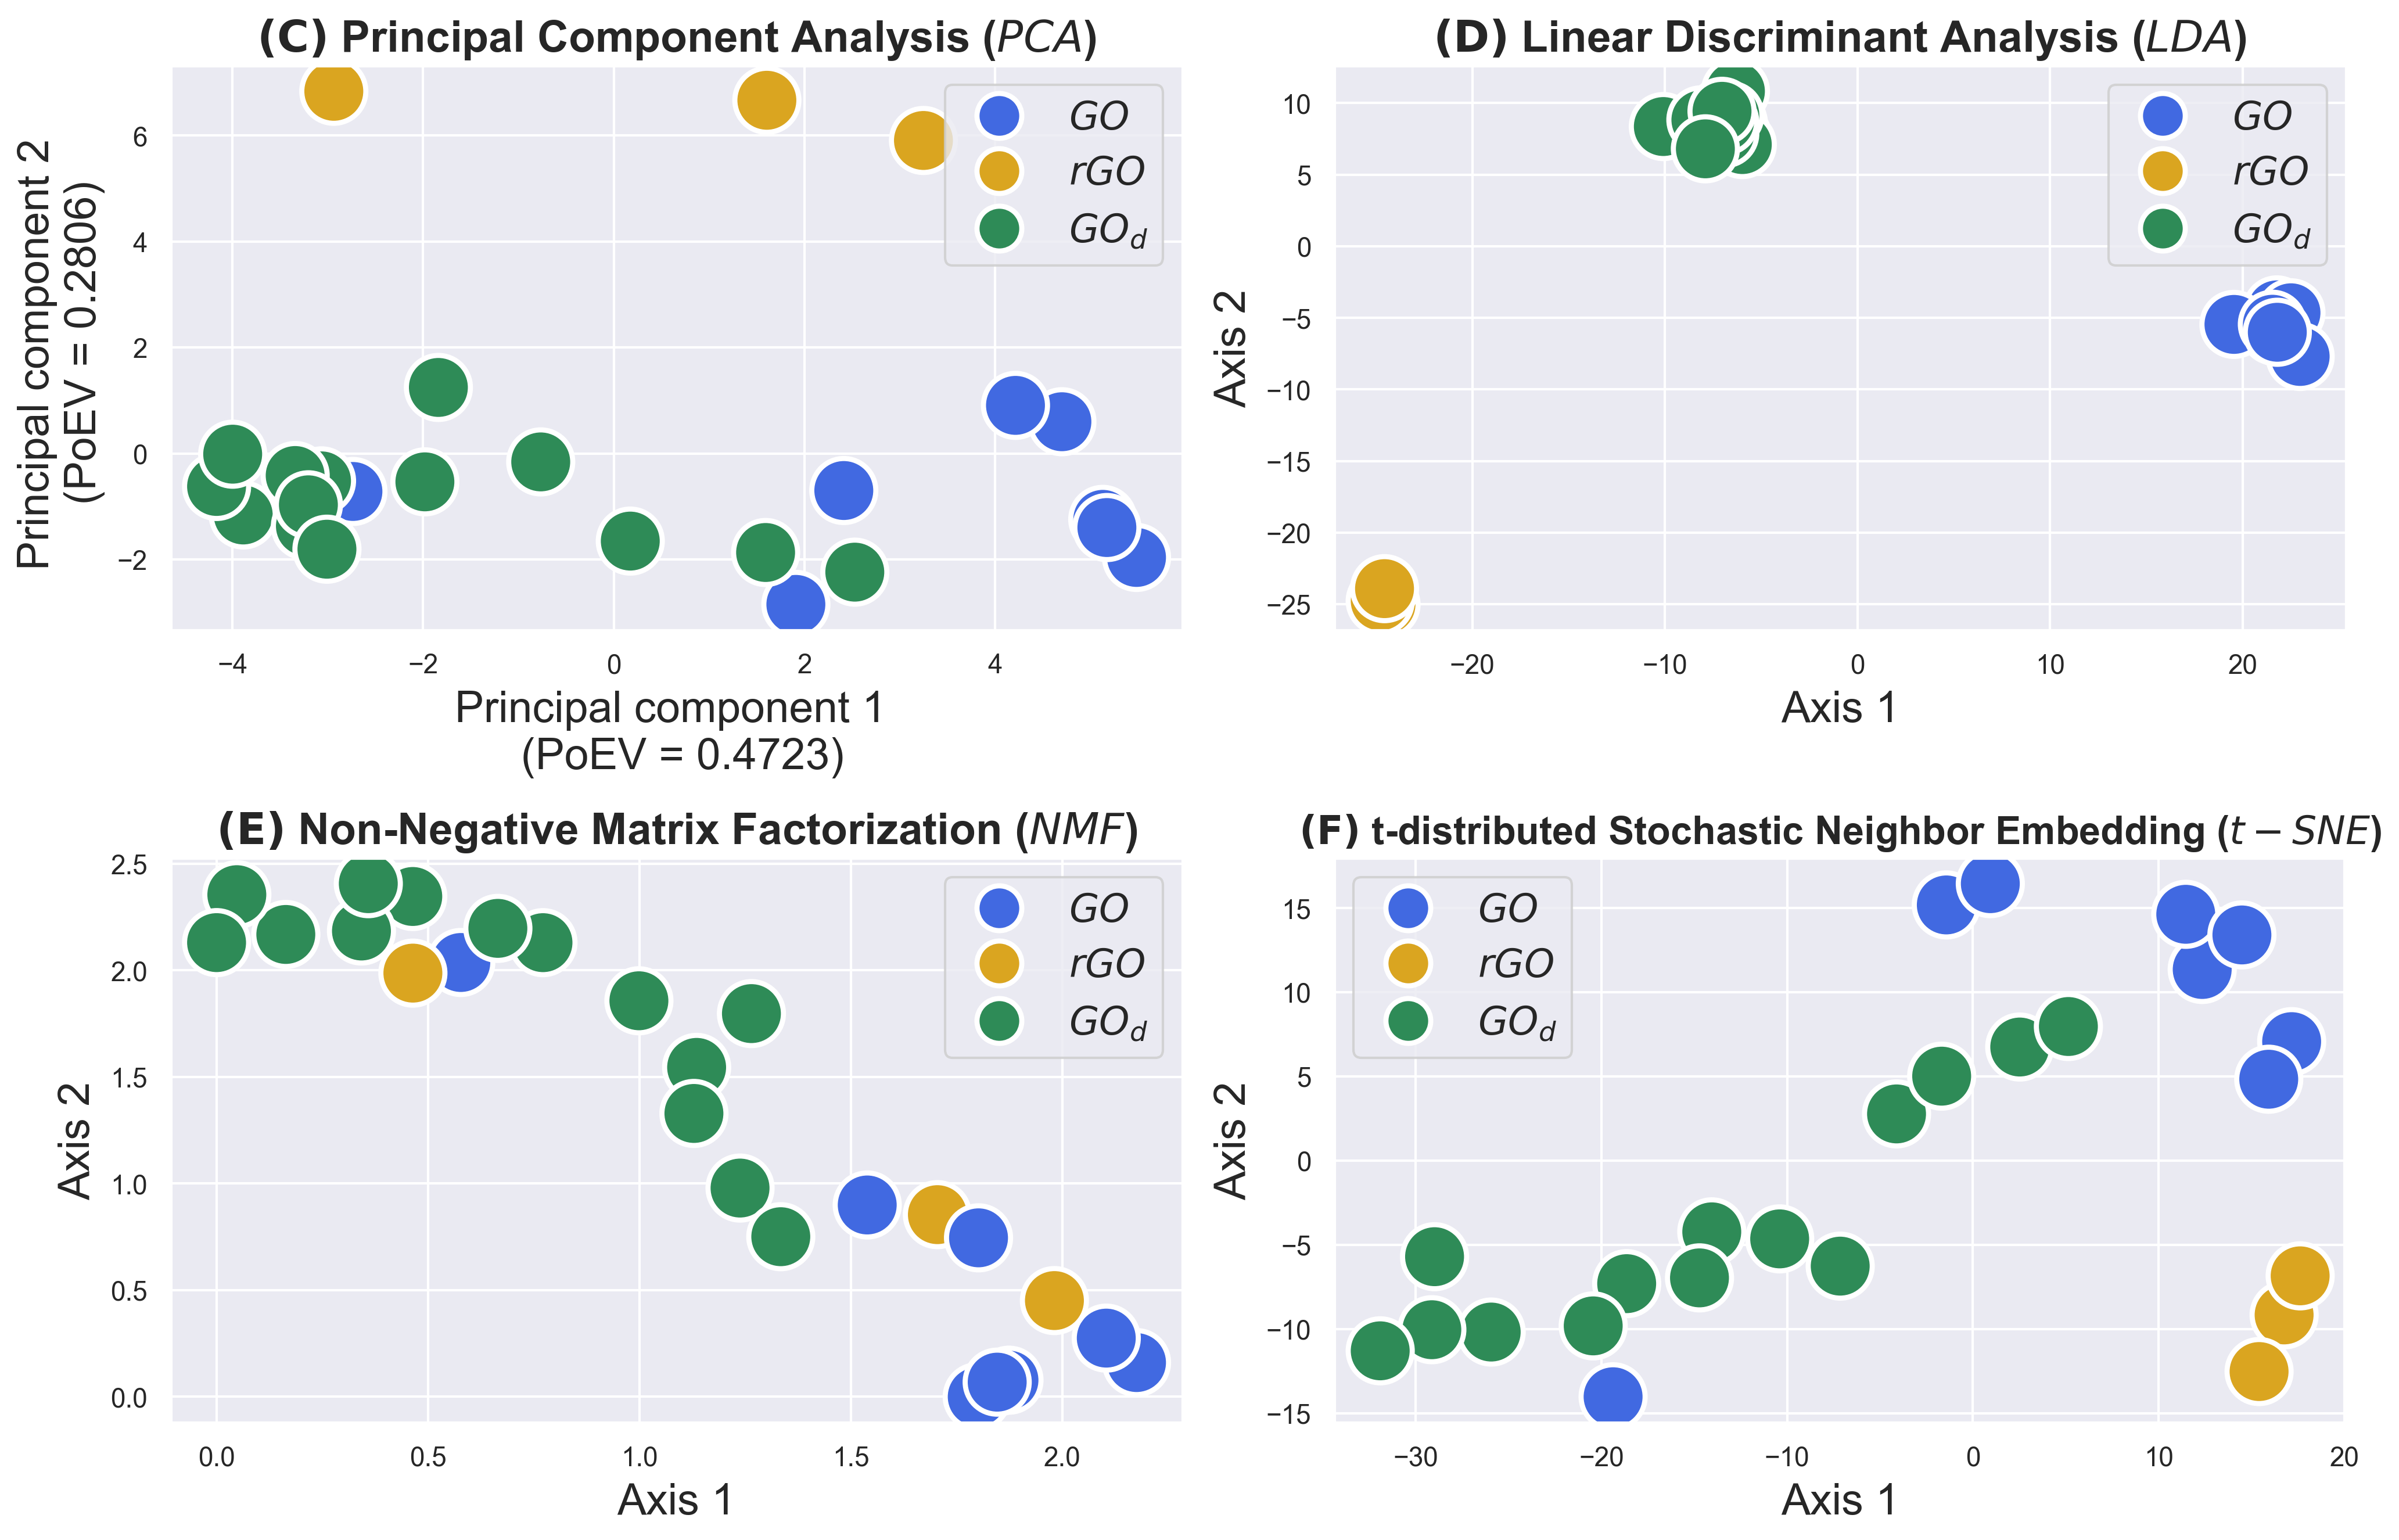

In [139]:
dimred.get_combined_visualization(
    figsize=(13.8, 9),
    palette=type_color_dict,
    markersize=markersize,
    fontsize=fontsize,
    path_to_save=f'{path_to_save}/dimred_4_subplots.png'
)

## Additional example of applying PCA

In [113]:
# dimred = DimensionalityReduction(data=data, hue=hue)

# dimred.get_pca(n_components=2, random_state=42)
# dimred.get_visualization(method='pca', figsize=figsize, palette=type_color_dict, markersize=markersize, fontsize=fontsize,
#                          # path_to_save=f'{path_to_save}/pca.png'
#                         )